# Customer Churn Analysis

## Overview
In today's business world, retaining customers is often more cost-effective than acquiring new ones. This analysis shows how to identify customers who are likely to leave your business.

### Objectives
- Analyze patterns in customer churn
- Identify key factors influencing customer decisions
- Build predictive models for early churn detection
- Provide actionable insights for retention strategies

### Dataset Overview
- 10,000 customer records
- 14 features including demographics, banking behavior, and satisfaction metrics
- Target variable: Customer churn (Exited)

## Table of Contents
1. [Data Preprocessing & Exploration](#1-data-preprocessing--exploration)
2. [Feature Analysis](#2-feature-analysis)
3. [Model Development](#3-model-development)
4. [Results & Insights](#4-results--insights)
5. [Recommendations](#5-recommendations)

## 1. Data Preprocessing & Exploration

### 1.1 Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
color_codes = sns.color_palette([
    "#264653",  # Deep slate blue
    "#2A9D8F",  # Teal green
    "#E9C46A",  # Golden yellow
    "#F4A261",  # Peach
    "#E76F51",  # Coral
    "#B7B7A4",  # Sage gray
    "#8A5A44"   # Rustic brown
])

In [3]:
sns.set_palette(color_codes)

### 1.2 Loading and Examining Data

In [4]:
df = pd.read_csv(('/kaggle/input/bank-customer-attrition-insights/Bank-Customer-Attrition-Insights-Data.csv'))

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15598695,Fields,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15649354,Johnston,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15737556,Vasilyev,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15671610,Hooper,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15625092,Colombo,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [6]:
print(f"Rows and columns in the dataset: {df.shape}")

Rows and columns in the dataset: (10000, 18)


### 1.3 Data Quality Check

- Understanding data types
- Checking for missing values
- Examining duplicates

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [8]:
null_values = df.isnull().sum().sum()
print(f"Number of missing values: {null_values}")
duplicated_values = df.duplicated().sum()
print(f"Number of duplicated values: {duplicated_values}")

Number of missing values: 0
Number of duplicated values: 0


In [9]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

### 1.4 Exploratory Data Analysis (EDA)

Dropping unnecessary columns.

In [10]:
df = df.drop(['RowNumber', 'CustomerId', "Surname"], axis=1)

In [11]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

### 1.4.1 Understanding distribution of each variable

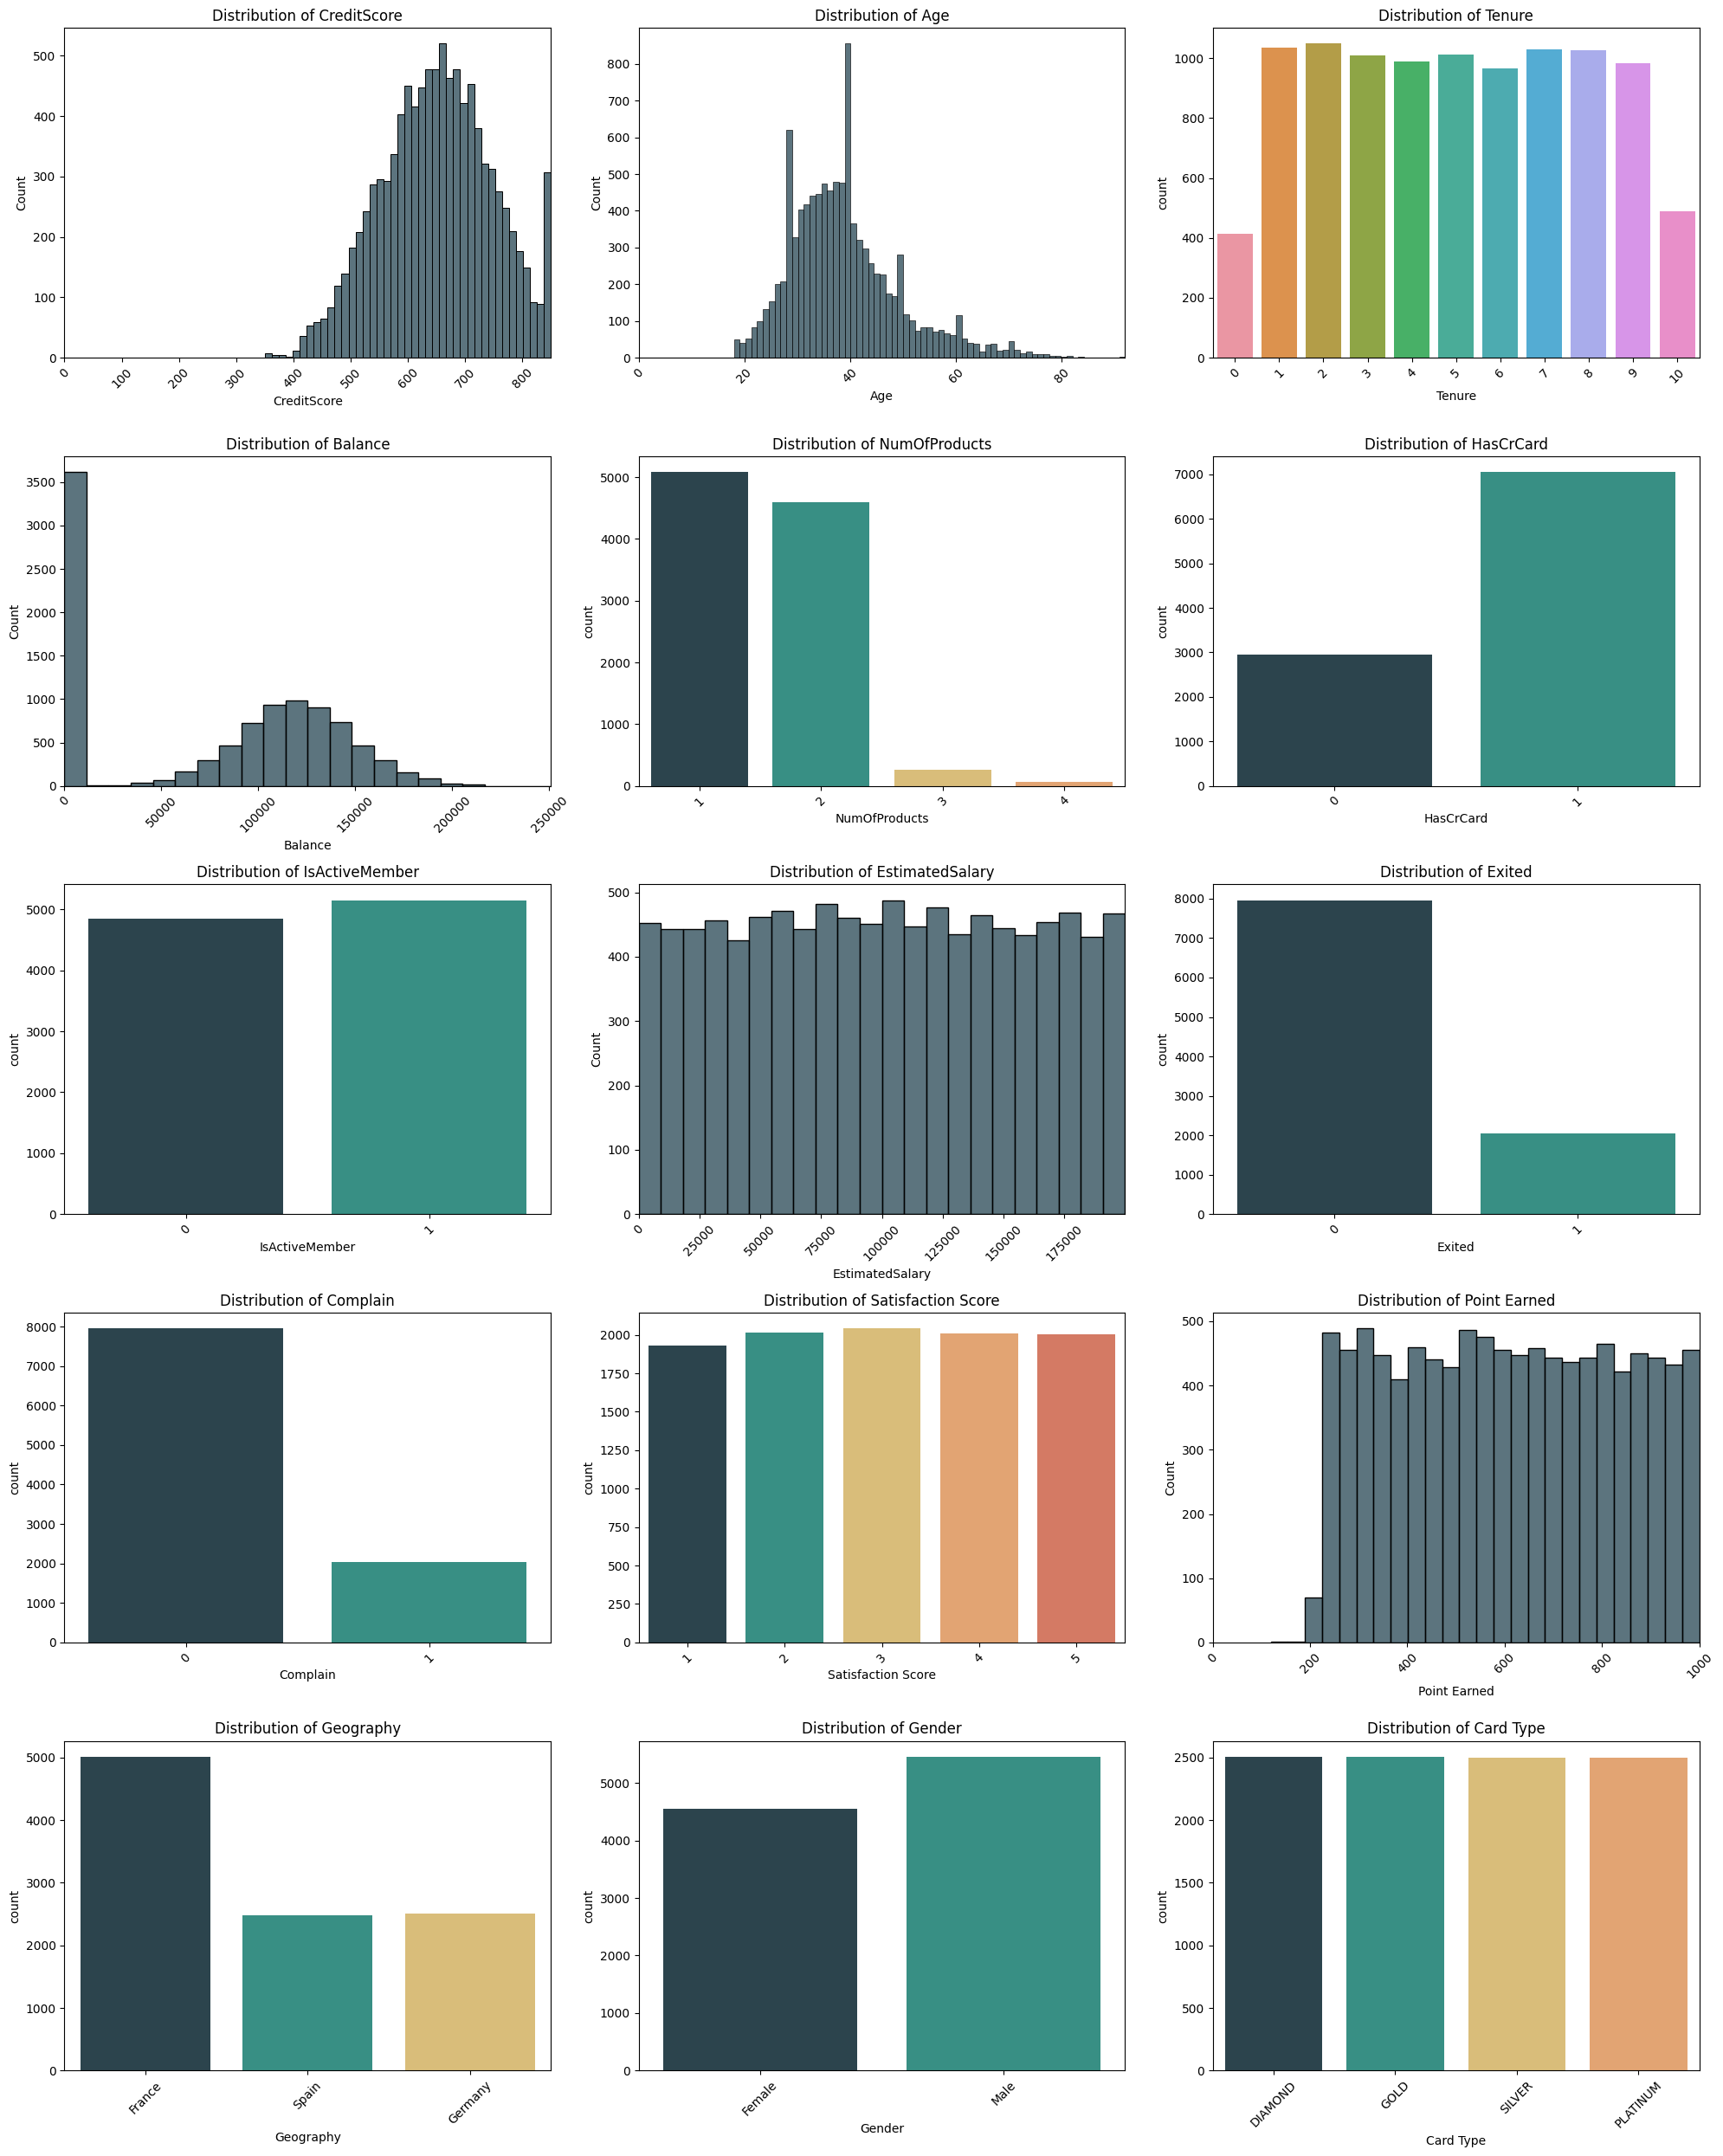

In [12]:
plot_columns = len(df.columns)
plot_rows = (plot_columns + 2) // 3

plt.figure(figsize=(20, plot_rows * 5))

plot_idx = 1

for column in numeric_cols:
    
    plt.subplot(plot_rows,3, plot_idx)
    
    unique_values = df[column].unique().size
    
    if unique_values <= 11:
        sns.countplot(df, x=column)
    else:
        sns.histplot(df, x=column)
        plt.xlim(0, df[column].max())
        
    plt.title(f"Distribution of {column}")
    plt.xticks(rotation=45)
    
    plot_idx += 1

for column in categorical_cols:
    
    plt.subplot(plot_rows, 3, plot_idx)
    sns.countplot(x=column, data=df)
    plt.title(f"Distribution of {column}")
    plt.xticks(rotation=45)
    
    plot_idx += 1
    
plt.tight_layout()
plt.show()


### 1.4.2 Visualizing the target variable (churn)

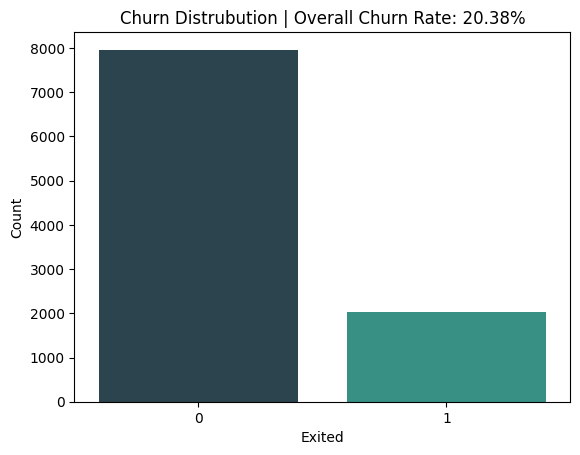

In [13]:
churn_rate = df['Exited'].mean() * 100

plt.Figure(figsize=(10, 6))
sns.countplot(x="Exited", data=df)
plt.title(f"Churn Distrubution | Overall Churn Rate: {churn_rate:.2f}%")
plt.xlabel("Exited")
plt.ylabel("Count")
plt.show()

## 2. Feature Analysis

### 2.1 Effect of age, credit score, balance, salary ,tenure, and points earned on churn

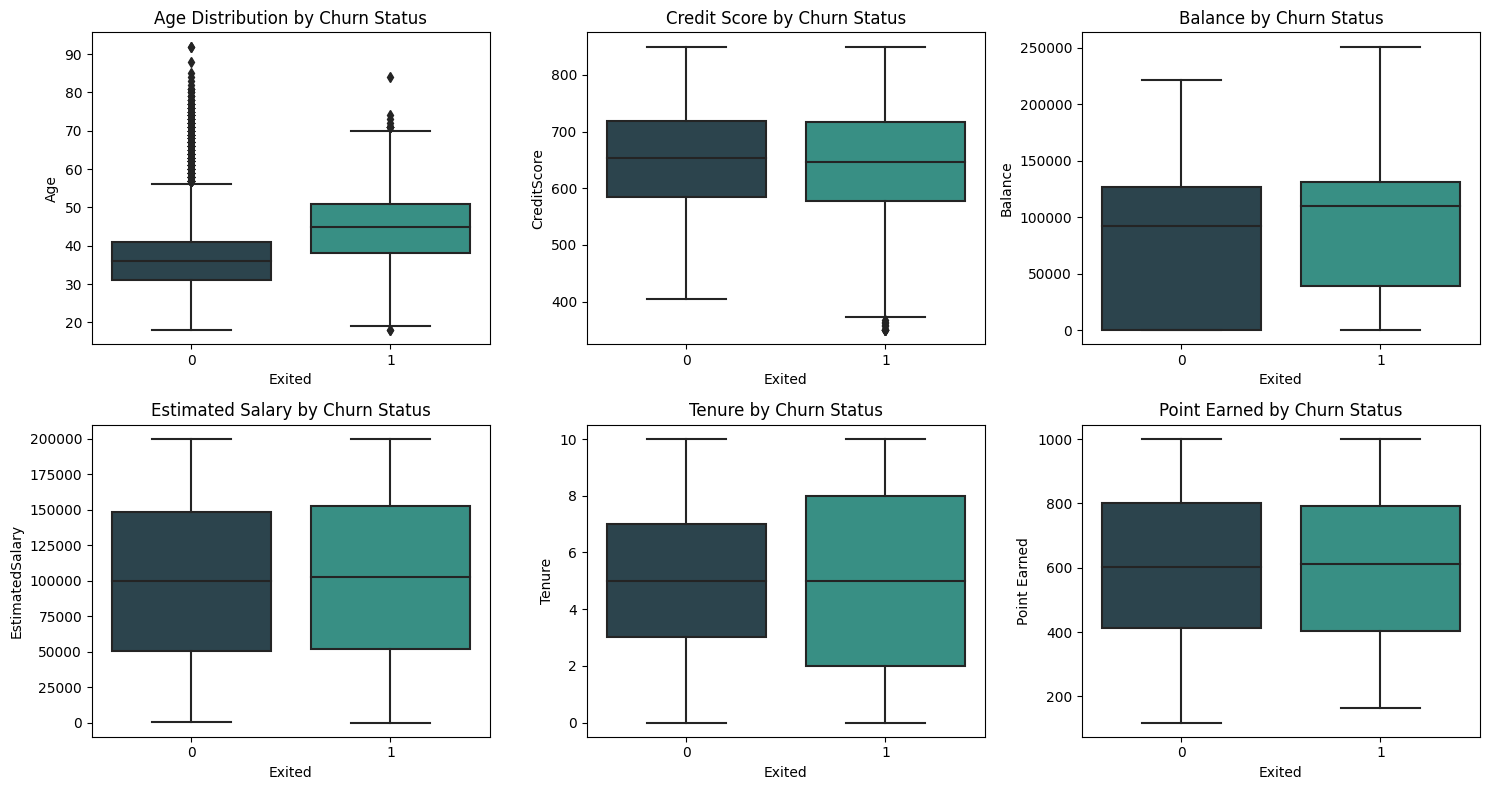

In [14]:
plt.figure(figsize=(15, 8))
# Age Distribution by Churn Status
plt.subplot(2, 3, 1)
sns.boxplot(x='Exited', y='Age', data=df)
plt.title('Age Distribution by Churn Status')

# Credit Score Distribution by Churn Status
plt.subplot(2, 3, 2)
sns.boxplot(x='Exited', y='CreditScore', data=df)
plt.title('Credit Score by Churn Status')

# Balance Distribution by Churn Status
plt.subplot(2, 3, 3)
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('Balance by Churn Status')

# Salary Distribution by Churn Status
plt.subplot(2, 3, 4)
sns.boxplot(x='Exited', y='EstimatedSalary', data=df)
plt.title('Estimated Salary by Churn Status')

# Tenure Distribution by Churn Status
plt.subplot(2, 3, 5)
sns.boxplot(x='Exited', y='Tenure', data=df)
plt.title('Tenure by Churn Status')

# Point Earned Distribution by Churn Status
plt.subplot(2, 3, 6)
sns.boxplot(x='Exited', y='Point Earned', data=df)
plt.title('Point Earned by Churn Status')


plt.tight_layout()
plt.show()


### 2.2 Effect of geography, satisfaction, complains, card type, and number of products on churn

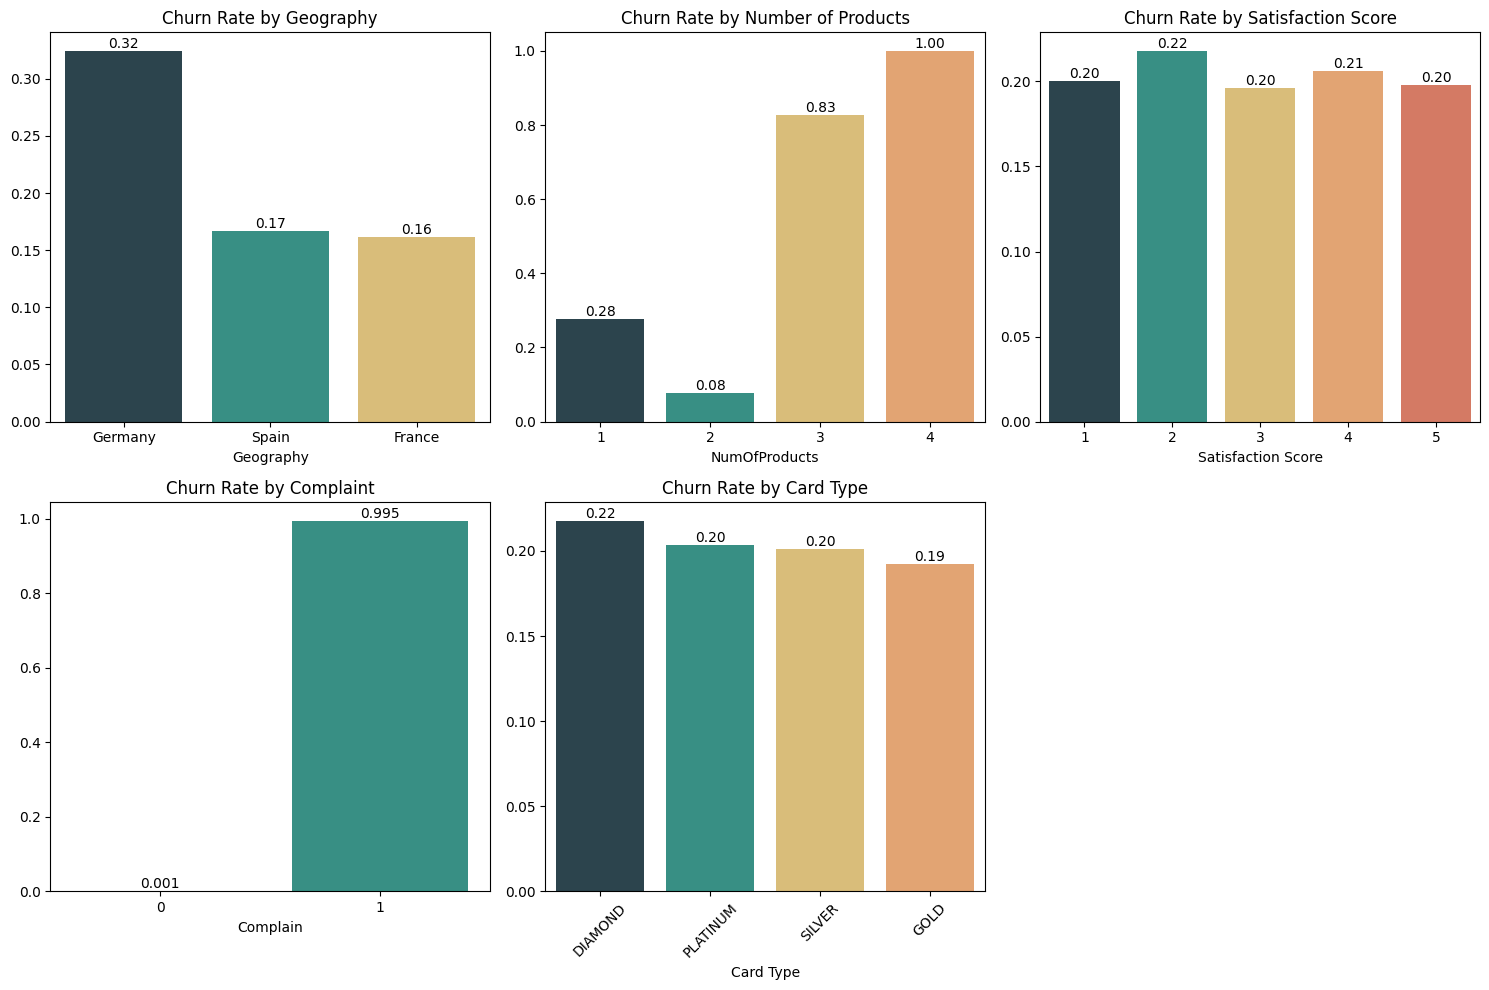

In [15]:
plt.figure(figsize=(15, 10))

# Geography Distribution
plt.subplot(2, 3, 1)
df_geo = df.groupby('Geography')['Exited'].mean().sort_values(ascending=False)
ax = sns.barplot(x=df_geo.index, y=df_geo.values)
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.title('Churn Rate by Geography')

# Product Distribution
plt.subplot(2, 3, 2)
df_prod = df.groupby('NumOfProducts')['Exited'].mean().sort_values(ascending=False)
ax = sns.barplot(x=df_prod.index, y=df_prod.values)
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.title('Churn Rate by Number of Products')

# Satisfaction Distribution
plt.subplot(2, 3, 3)
df_satis = df.groupby('Satisfaction Score')['Exited'].mean().sort_values(ascending=False)
ax =sns.barplot(x=df_satis.index, y=df_satis.values)
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.title('Churn Rate by Satisfaction Score')

# Complaint Distribution
plt.subplot(2, 3, 4)
df_compl = df.groupby('Complain')['Exited'].mean().sort_values(ascending=False)
ax = sns.barplot(x=df_compl.index, y=df_compl.values)
ax.bar_label(ax.containers[0], fmt='%.3f')
plt.title('Churn Rate by Complaint')

# Card Type Distribution
plt.subplot(2, 3, 5)
df_card = df.groupby('Card Type')['Exited'].mean().sort_values(ascending=False)
ax = sns.barplot(x=df_card.index, y=df_card.values)
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.title('Churn Rate by Card Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2.3 Correlation Analysis

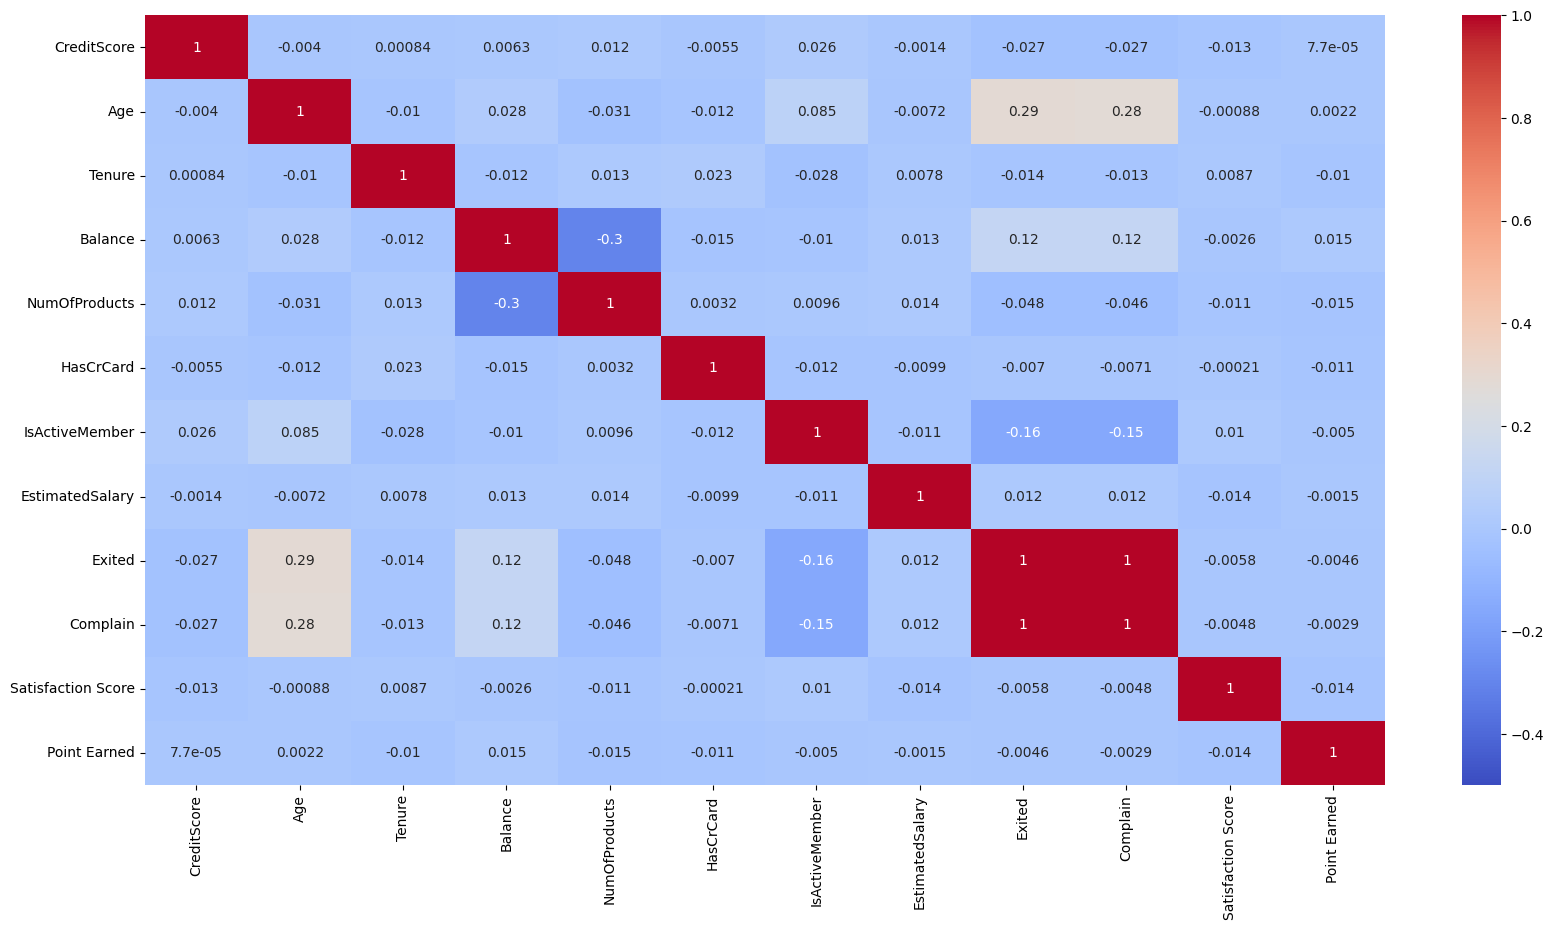

In [16]:
plt.figure(figsize=(20, 10))
corr_plot = sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-0.5, vmax=1, cmap="coolwarm")
plt.show()

#### 2.3.1 Findings: 

Anyone who complains is almost 100% likely to churn — which feels odd and makes the data look weird. If we just look at the "Complain" column, we can see who's going to churn, which'll make this data analysis pointless. 

I'm guessing that it's an issue with the data, so I'll remove the "Complain" column while modeling and see what happens.

# 3. Model Development

## 3.1 Data Preprocessing
- Encoding categorical variables
- Feature scaling
- Train-test split

In [17]:
df_model = pd.get_dummies(df, columns=['Geography', 'Gender', 'Card Type'], dtype=int)

In [18]:
X = df_model.drop(['Exited', "Complain"], axis=1)
y = df_model['Exited']

In [19]:
scaler = StandardScaler()
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Point Earned']
X[numerical_features] = scaler.fit_transform(X[numerical_features])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3.2 Model Training and Initial Results

#### 3.2.1 Logistic Regression

In [20]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

lr_preds = lr_model.predict(X_test)

# Evaluate
print("Logistic Regression Results:")
print(classification_report(y_test, lr_preds))

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



#### 3.2.2 Random Forest

In [21]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("\nRandom Forest Results:")
print(classification_report(y_test, rf_preds))


Random Forest Results:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.45      0.56       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



#### 3.2.3 Support Vector Machine

In [22]:
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

print("SVM Results:")
print(classification_report(y_test, svm_preds))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, svm_preds))
print("-" * 50)

SVM Results:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1607
           1       0.84      0.29      0.43       393

    accuracy                           0.85      2000
   macro avg       0.85      0.64      0.67      2000
weighted avg       0.85      0.85      0.82      2000


Confusion Matrix:
[[1585   22]
 [ 278  115]]
--------------------------------------------------


#### 3.2.4 K-Nearest Neighbors

In [23]:
knn_model = KNeighborsClassifier(n_neighbors=3, weights="distance")
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)

print("\nKNN Results:")
print(classification_report(y_test, knn_preds))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, knn_preds))
print("-" * 50)


KNN Results:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1607
           1       0.58      0.33      0.42       393

    accuracy                           0.82      2000
   macro avg       0.71      0.63      0.66      2000
weighted avg       0.80      0.82      0.80      2000


Confusion Matrix:
[[1513   94]
 [ 265  128]]
--------------------------------------------------


#### 3.2.5 Decision Tree

In [24]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

print("\nDecision Tree Results:")
print(classification_report(y_test, dt_preds))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, dt_preds))
print("-" * 50)


Decision Tree Results:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1607
           1       0.46      0.52      0.49       393

    accuracy                           0.79      2000
   macro avg       0.67      0.69      0.68      2000
weighted avg       0.80      0.79      0.79      2000


Confusion Matrix:
[[1371  236]
 [ 188  205]]
--------------------------------------------------


### 3.3 Model Comparison
Comparing performance across all models

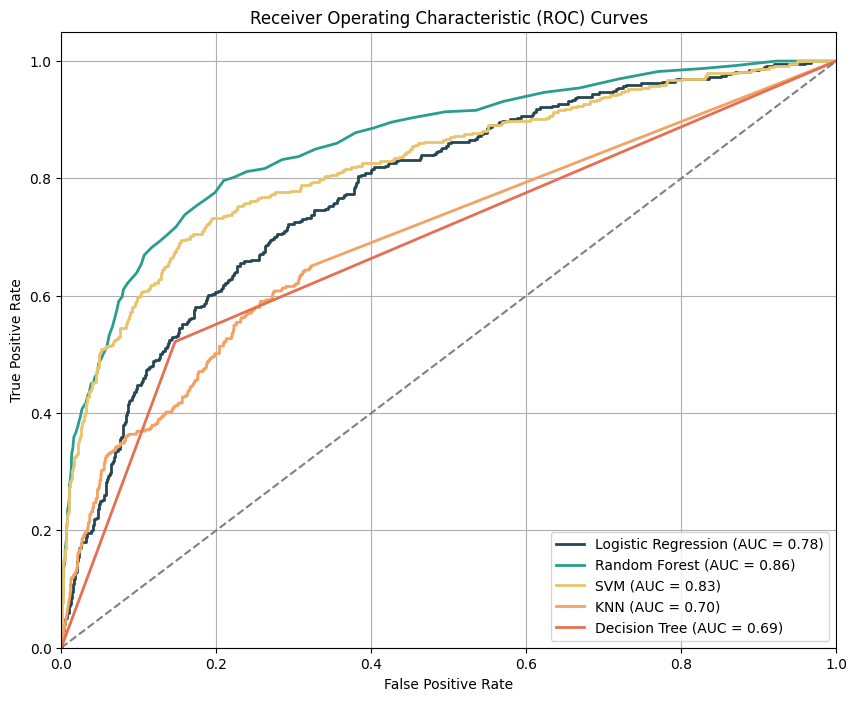

In [25]:
def plot_roc_curves(models, X_test, y_test):
    plt.figure(figsize=(10, 8))
    
    colors = color_codes
    
    for (name, model), color in zip(models.items(), colors):
        # Get probability predictions
        if hasattr(model, 'predict_proba'):
            y_pred_proba = model.predict_proba(X_test)[:, 1]
        else:  # For SVM, which doesn't have predict_proba by default
            y_pred_proba = model.decision_function(X_test)
            
        # Calculate ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        
        # Plot ROC curve
        plt.plot(fpr, tpr, color=color, lw=2,
                label=f'{name} (AUC = {roc_auc:.2f})')
    
    # Plot diagonal line (random classifier)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    
    # Customize the plot
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

models = {
    'Logistic Regression': lr_model,
    'Random Forest': rf_model,
    'SVM': svm_model,
    'KNN': knn_model,
    'Decision Tree': dt_model
}

plot_roc_curves(models, X_test, y_test)

**Findings**:

Random Forest model (AUC = 0.86) provides the most accurate results.

### 3.4 Model Optimization

#### 3.4.1 Creating New Features
- Balance per Product
- Points per Product
- Salary Balance Ratio

In [26]:
df_model['Balance_per_Product'] = df_model['Balance'] / df_model['NumOfProducts']
df_model['Points_per_Product'] = df_model['Point Earned'] / df_model['NumOfProducts']
df_model['Salary_Balance_Ratio'] = df_model['Balance'] / df_model['EstimatedSalary']

In [27]:
X = df_model.drop(['Exited', 'Complain'], axis=1)
y = df_model['Exited']

#### 3.4.2. Fine-tuning the best performing model (Random Forest)

In [28]:
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 
                     'Point Earned']
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
rf_model_balanced = RandomForestClassifier(
    random_state=42,
    class_weight='balanced'
)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    rf_model_balanced, 
    param_grid, 
    cv=5, 
    scoring='f1_macro',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1_macro')

## 4. Results & Insights

### 4.1 Model Performance Summary
- Random Forest achieved highest AUC (0.86)
- Best parameters from GridSearch
- Feature importance analysis

In [30]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation score: 0.7650695159485665


In [31]:
best_rf_preds = grid_search.predict(X_test)

print("\nRandom Forest Results with Best Parameters:")
print(classification_report(y_test, best_rf_preds))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, best_rf_preds))


Random Forest Results with Best Parameters:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1607
           1       0.61      0.66      0.63       393

    accuracy                           0.85      2000
   macro avg       0.76      0.78      0.77      2000
weighted avg       0.86      0.85      0.85      2000


Confusion Matrix:
[[1442  165]
 [ 134  259]]


**Findings**:

The Random Forest model with best parameters demonstrated superior performance despite a marginally lower accuracy (0.85 vs 0.86). While the base model showed bias towards class 0 (0.96 recall but 0.45 for class 1), the optimized model achieved more balanced predictions across both classes (0.90 and 0.66 recall respectively). This balanced performance, particularly the improved detection of class 1 cases (259 correct predictions), makes it more suitable for practical applications.

### 4.2 Feature importance

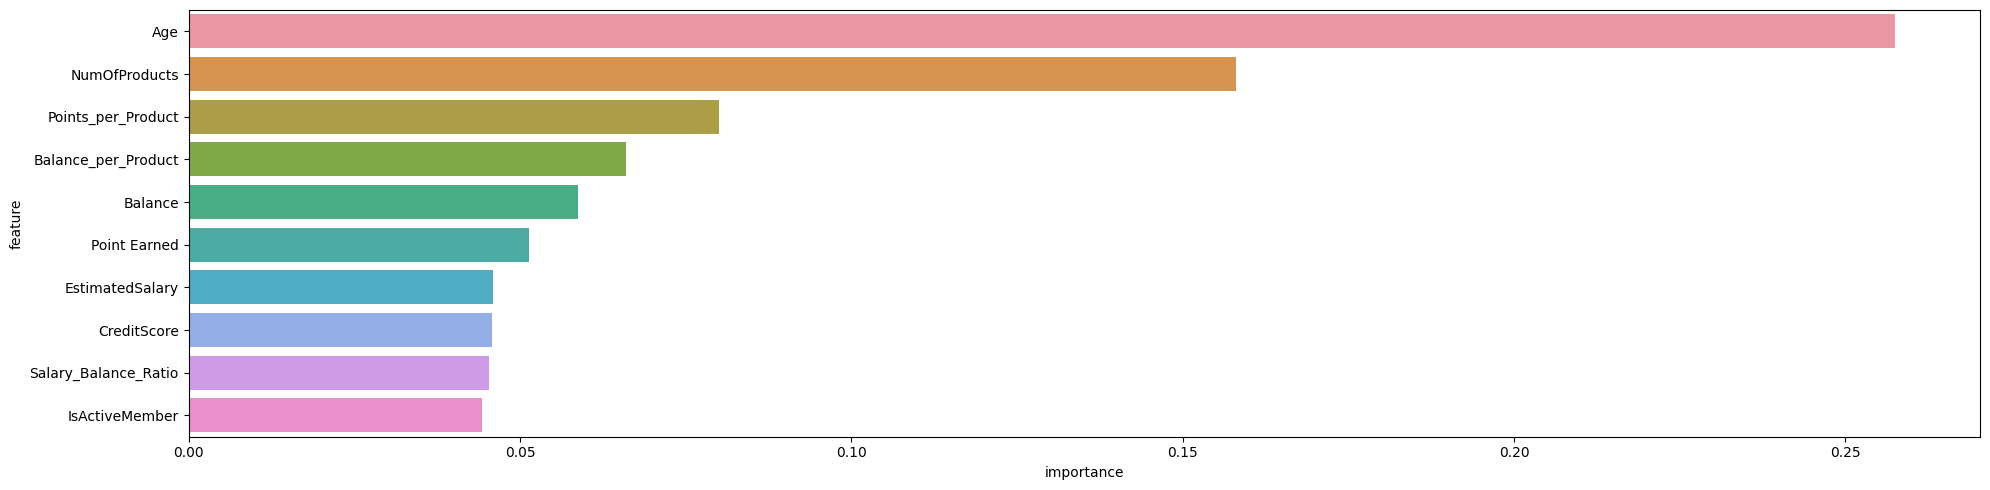

In [32]:
best_rf = grid_search.best_estimator_
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_rf.feature_importances_
})
top_10_features = feature_importance.sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(20,5))
sns.barplot(y='feature', x='importance', data=top_10_features, orient='h')

plt.tight_layout()
plt.show()

### 4.2 Key Findings

1. **Customer Demographics**
   - Age is the most influential factor in predicting churn, with the highest importance score (≈0.25)
   - Older customers appear to be more likely to churn

2. **Product Usage**
   - Number of Products is the second most important predictor (≈0.15)
   - Points per Product and Balance per Product are both significant factors, suggesting that customer engagement and financial activity are crucial indicators

3. **Financial Indicators**
   - Balance and Point Earned show moderate importance (≈0.07)
   - Salary_Balance_Ratio has relatively lower importance but still influences churn
   - CreditScore has similar importance to EstimatedSalary (≈0.05)

## 5. Recommendations

### 5.1 Strategic Planning
1. **Age-Based Strategy**
   - Develop targeted retention programs for different age segments
   - Create special benefits/services for older customers
   - Design age-appropriate communication strategies

2. **Product Portfolio Optimization**
   - Review and optimize the multi-product strategy
   - Create bundled offers that encourage optimal product usage
   - Develop loyalty programs based on Points per Product metrics

3. **Customer Engagement**
   - Implement regular engagement monitoring using the Points system
   - Set up early warning systems based on Balance per Product ratios
   - Create intervention strategies when engagement metrics decline

### 5.2 Implementation Priority

1. **Immediate Actions (0-3 months)**
   - Launch age-segmented retention programs
   - Implement engagement monitoring system
   - Review product bundling strategy

2. **Medium-term (3-6 months)**
   - Develop new loyalty program based on Points per Product
   - Create automated early warning system
   - Implement personalized communication strategies

3. **Long-term (6-12 months)**
   - Build comprehensive customer lifecycle management
   - Develop predictive churn prevention system
   - Create automated intervention programs